In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
#loading the dataset

csv_data = pd.read_csv('creditcard.csv')

In [5]:
csv_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
csv_data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
#dataset information

csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#checking for missing values 
csv_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
csv_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
standard_scaler = StandardScaler()
csv_data['Amount'] = standard_scaler.fit_transform(pd.DataFrame(csv_data['Amount']))
csv_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
#dropping time column 
csv_data = csv_data.drop(['Time'], axis=1)
csv_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
csv_data.shape

(284807, 30)

In [13]:
csv_data.duplicated().any()

True

In [14]:
#dropping duplicates 
csv_data = csv_data.drop_duplicates()
csv_data.shape

(275663, 30)

In [15]:
csv_data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

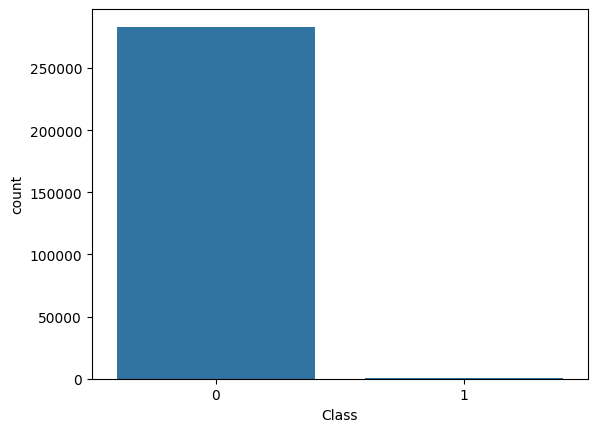

In [101]:
sns.countplot(x='Class', data=csv_data)
plt.show()

#### To Handle this imbalance in Class Column 
 We need to either undersample or oversample

In [22]:
#Undersample

In [102]:
normal = csv_data[csv_data['Class']==0]
fraud = csv_data[csv_data['Class']==1]

In [103]:
normal.shape

(283253, 31)

In [104]:
fraud.shape

(473, 31)

In [108]:
normal_sample = normal.sample(n=473)

In [109]:
normal_sample.shape

(473, 31)

In [110]:
new_data = pd.concat([normal_sample,fraud], ignore_index=1)
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [111]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,169547.0,-0.388331,-4.027658,-3.945312,1.374723,-0.412143,-0.679077,2.495913,-0.701476,-0.371502,...,1.081569,0.235595,-1.275753,0.893590,0.144970,0.534036,-0.385571,0.126101,1294.40,0
1,63128.0,1.408641,-1.351639,1.211894,-1.090188,-2.145457,-0.347265,-1.529943,0.013755,-1.047675,...,-0.227970,-0.132148,0.045065,0.384236,0.243154,-0.197977,0.075294,0.036769,36.00,0
2,55405.0,-1.637908,-0.830466,1.294878,0.453392,-0.477077,0.353595,-0.895274,0.902819,-1.259234,...,0.055849,0.208607,0.105225,-0.358577,-0.168764,-0.145266,0.315386,-0.020323,111.00,0
3,136137.0,2.101807,-0.087574,-1.736859,0.234584,0.528026,-0.497436,0.172068,-0.258758,0.403890,...,0.179101,0.574454,-0.029364,0.143587,0.227148,0.496951,-0.076188,-0.063059,19.99,0
4,72876.0,-1.022912,2.005399,-0.248342,0.749492,0.062517,-0.949299,0.748691,0.091536,0.155262,...,0.056876,0.730848,0.154086,0.404605,-0.614275,-0.414210,0.587959,0.192169,0.65,0


In [112]:
# Store Feature Matrix as X and Target Y
X = new_data.drop('Class', axis=1)
Y = new_data['Class']

In [32]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)

## Logistic Regression

In [114]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

G:\Softwares\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
Y_predict1 = logistic_regression.predict(X_test)

In [116]:
accuracy_score(Y_test,Y_predict1)

0.9315789473684211

In [117]:
precision_score(Y_test,Y_predict1)

0.968421052631579

In [118]:
f1_score(Y_test,Y_predict1)

0.934010152284264

In [119]:
recall_score(Y_test,Y_predict1)

0.9019607843137255

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

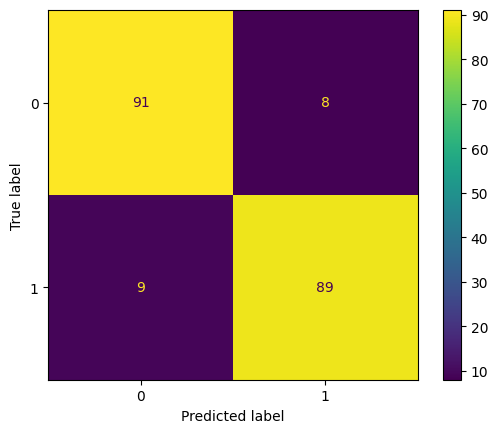

In [51]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_predict1)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
from sklearn.metrics import roc_curve, auc

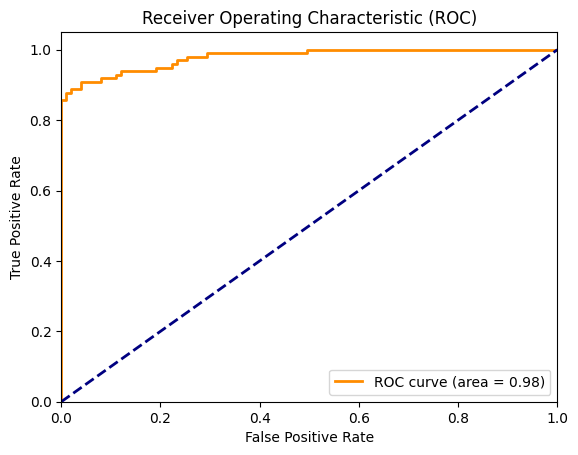

In [53]:
Y_predict_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [122]:
Y_predict2 = rf.predict(X_test)

In [123]:
accuracy_score(Y_test, Y_predict2)

0.9473684210526315

In [124]:
precision_score(Y_test, Y_predict2)

0.9893617021276596

In [125]:
recall_score(Y_test, Y_predict2)

0.9117647058823529

In [126]:
f1_score(Y_test, Y_predict2)

0.9489795918367347

In [139]:
accuracy_lr = accuracy_score(Y_test, Y_predict1) * 100
accuracy_rf = accuracy_score(Y_test, Y_predict2) * 100
                    

In [140]:
final = pd.DataFrame({
    'Model': ['LR', 'RF'],
    'Accuracy': [accuracy_lr, accuracy_rf]
})


In [141]:
final

,Model,Accuracy
0,LR,93.157895
1,RF,94.736842


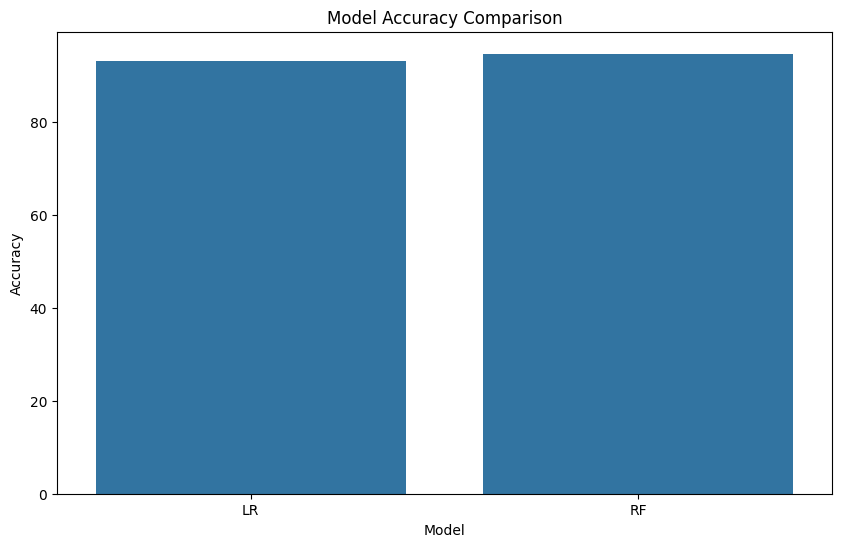

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final, x='Model', y='Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')


plt.show()

### Over Sampling

In [16]:
# Store Feature Matrix as X and Target Y
X = csv_data.drop('Class', axis=1)
Y = csv_data['Class']

In [17]:
X.shape

(275663, 29)

In [18]:
Y.shape

(275663,)

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [21]:
Y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [56]:
X_train, X_test, Y_train,Y_test = train_test_split(X_res,Y_res, test_size = 0.20, random_state=42)

## Logistic Regression

In [164]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

G:\Softwares\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
y_pred1 = logistic_regression.predict(X_test)

In [166]:
accuracy_score(Y_test,y_pred1)

0.9583742141792944

In [167]:
precision_score(Y_test,y_pred1)

0.9807402604832097

In [168]:
recall_score(Y_test,y_pred1)

0.9350580877406687

In [169]:
f1_score(Y_test,y_pred1)

0.9573545288708537

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [22]:
y_pred3 = rf.predict(X_test)

In [23]:
accuracy_score(Y_test,y_pred3)

0.999918238308078

In [43]:
precision_score(Y_test,y_pred3)

0.9998545745396376

In [44]:
recall_score(Y_test,y_pred3)

1.0

In [45]:
f1_score(Y_test,y_pred3)

0.9999272819822932

### Save the Model

In [23]:
rf1 = RandomForestClassifier()
rf1.fit(X_res, Y_res)

RandomForestClassifier()

In [24]:
import joblib

In [25]:
joblib.dump(rf1,"credit_card.joblib")

['credit_card.joblib']

In [26]:
model = joblib.load("credit_card.joblib")

In [27]:
example_fraudulent_input = [
    10.0,   # Transaction amount (e.g., very high)
    20.0,   # Frequency of transactions (e.g., extremely high)
    5.0,    # Transaction time (e.g., unusual time of day)
    10.0,   # Merchant category (e.g., known high-risk category)
    2.0,    # Transaction location (e.g., foreign or unusual location)
    10.0,   # User behavior pattern (e.g., highly abnormal behavior)
    1.0,    # Account age (e.g., new account)
    5.0,    # Transaction type (e.g., unusually high amount)
    3.0,    # Device used (e.g., unfamiliar or unrecognized device)
    50.0,   # Number of transactions (e.g., extremely high)
    10.0,   # Transaction frequency in the last 24 hours (e.g., very high)
    5.0,    # Previous fraud incidents (e.g., multiple previous frauds)
    3.0,    # IP address anomalies (e.g., highly unusual IP)
    0.1,    # Transaction approval rate (e.g., very low)
    0.5,    # Credit score change (e.g., significant drop)
    10.0,   # Average transaction amount (e.g., extremely high)
    2.0,    # High-risk flag (e.g., flagged by system)
    5.0,    # Account balance (e.g., very low or unusual balance)
    1.0,    # User login location (e.g., new or unexpected location)
    0.1,    # Time since last transaction (e.g., very short interval)
    2.0,    # Amount of cashback/discount (e.g., unusually high discount)
    1.0,    # Transaction origin (e.g., unknown or suspicious origin)
    3.0,    # Device location (e.g., foreign location)
    0.1,    # Transaction type anomaly (e.g., unusual transaction type)
    10.0,   # Frequency of account changes (e.g., very high)
    5.0,    # Number of failed login attempts (e.g., high)
    2.0,    # User behavior score (e.g., very high risk score)
    1.0,    # Historical transaction anomalies (e.g., many anomalies)
    10.0    # Risk score (e.g., very high risk)
]

# Prediction for the example fraudulent input
pred = model.predict([example_fraudulent_input])
print(pred)  # This should ideally output 1 for fraud if the values are indicative of fraud



[0]


G:\Softwares\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction
